<a href="https://colab.research.google.com/github/eugeniapramesti/Stock-Prediction/blob/main/Stock_Prediction_CNN_BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Analysis

In [ ]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
# Import libraries
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For data preprocessing and analysis part
data = pd.read_excel('/content/drive/MyDrive/MachineLearning/BBCA_dataprice.xlsx')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-07-31,3435.631645,3477.191706,3431.013861,3454.102783,65311000.0,0.0,0
1,2017-08-01,3486.427273,3504.898411,3458.720566,3495.662842,88810000.0,0.0,0
2,2017-08-02,3495.662842,3504.898411,3477.191704,3495.662842,62681500.0,0.0,0
3,2017-08-03,3518.751793,3518.751793,3426.396103,3463.338379,43917500.0,0.0,0
4,2017-08-04,3463.338654,3463.338654,3426.396375,3431.014160,70007000.0,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1256 non-null   datetime64[ns]
 1   Open          1255 non-null   float64       
 2   High          1255 non-null   float64       
 3   Low           1255 non-null   float64       
 4   Close         1255 non-null   float64       
 5   Volume        1255 non-null   float64       
 6   Dividends     1256 non-null   float64       
 7   Stock Splits  1256 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 78.6 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1256.000000,1256.000000
mean,5615.642379,5666.128212,5558.915038,5612.780879,7.983317e+07,0.382962,0.003981
std,1186.870797,1196.635812,1174.073975,1184.910905,4.870713e+07,5.336629,0.141083
min,3435.631645,3463.338435,3417.160615,3431.014160,0.000000e+00,0.000000,0.000000
25%,4483.680176,4530.385016,4446.316309,4483.680176,5.269025e+07,0.000000,0.000000
50%,5674.348905,5712.178006,5636.520720,5674.349609,7.020700e+07,0.000000,0.000000
75%,6404.430224,6451.279984,6363.451912,6400.107910,9.668335e+07,0.000000,0.000000
max,8250.000000,8250.000000,8075.000000,8200.000000,5.379715e+08,120.000000,5.000000


In [ ]:
data.isnull().sum()

Date            0
Open            1
High            1
Low             1
Close           1
Volume          1
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

<ipython-input-80-fa1560e9013b>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-07-31,3435.631645,3477.191706,3431.013861,3454.102783,65311000.0,0.0,0
1,2017-08-01,3486.427273,3504.898411,3458.720566,3495.662842,88810000.0,0.0,0
2,2017-08-02,3495.662842,3504.898411,3477.191704,3495.662842,62681500.0,0.0,0
3,2017-08-03,3518.751793,3518.751793,3426.396103,3463.338379,43917500.0,0.0,0
4,2017-08-04,3463.338654,3463.338654,3426.396375,3431.014160,70007000.0,0.0,0


In [ ]:
# check if there's any missing value from the data
# data.isnull().sum()

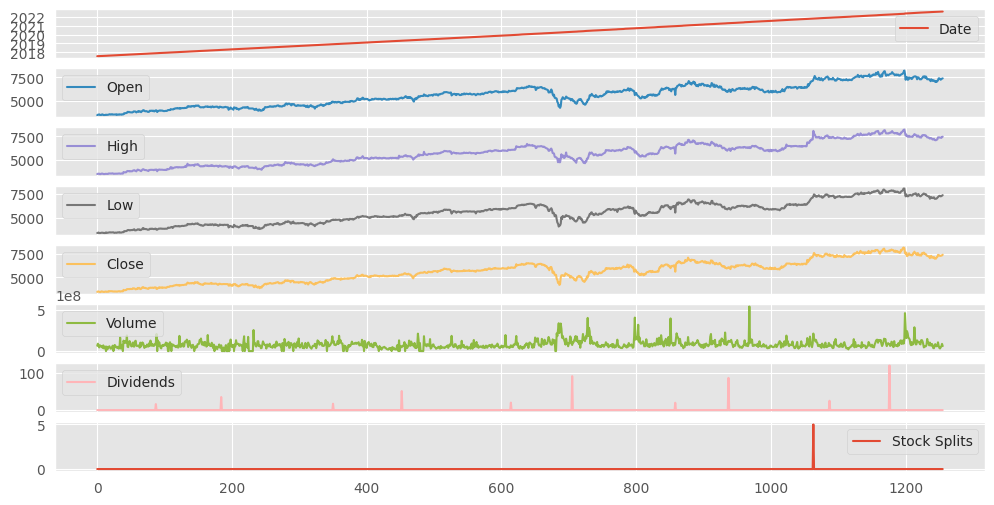

<ipython-input-82-9a77a06bb070>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


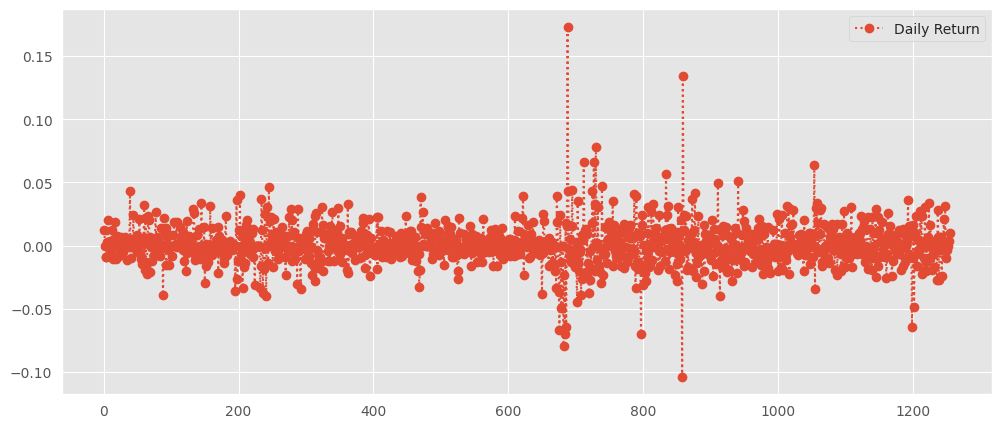

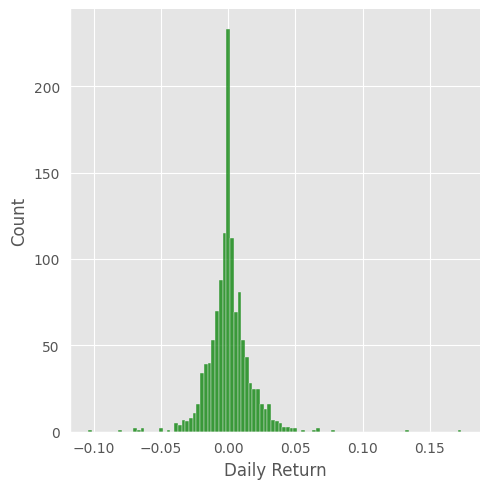

<ipython-input-82-9a77a06bb070>:34: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


           Date         Open         High          Low        Close  \
0    2017-07-31  3435.631645  3477.191706  3431.013861  3454.102783   
1    2017-08-01  3486.427273  3504.898411  3458.720566  3495.662842   
2    2017-08-02  3495.662842  3504.898411  3477.191704  3495.662842   
3    2017-08-03  3518.751793  3518.751793  3426.396103  3463.338379   
4    2017-08-04  3463.338654  3463.338654  3426.396375  3431.014160   
...         ...          ...          ...          ...          ...   
1251 2022-07-25  7350.000000  7375.000000  7300.000000  7300.000000   
1252 2022-07-26  7250.000000  7375.000000  7250.000000  7300.000000   
1253 2022-07-27  7325.000000  7350.000000  7275.000000  7325.000000   
1254 2022-07-28  7375.000000  7450.000000  7325.000000  7350.000000   
1255 2022-07-29  7400.000000  7475.000000  7375.000000  7425.000000   

          Volume  Dividends  Stock Splits  MA for 10 days  MA for 50 days  \
0     65311000.0        0.0             0     5614.243732     5621.481

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

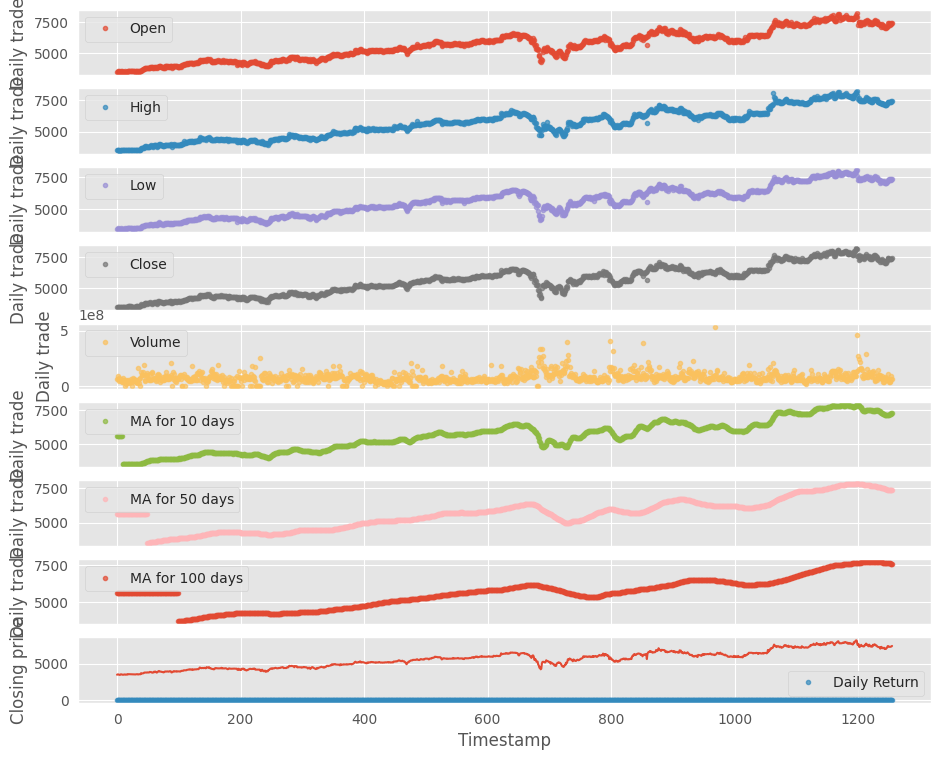

In [ ]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

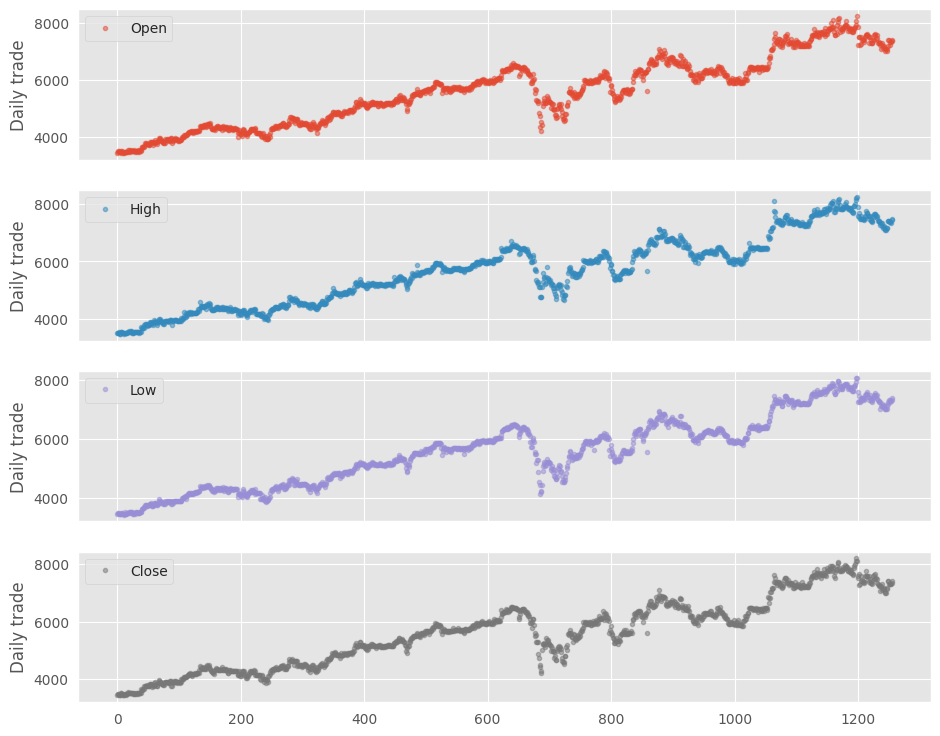

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date         Open         High          Low        Close  \
0    2017-07-31  3435.631645  3477.191706  3431.013861  3454.102783   
1    2017-08-01  3486.427273  3504.898411  3458.720566  3495.662842   
2    2017-08-02  3495.662842  3504.898411  3477.191704  3495.662842   
3    2017-08-03  3518.751793  3518.751793  3426.396103  3463.338379   
4    2017-08-04  3463.338654  3463.338654  3426.396375  3431.014160   
...         ...          ...          ...          ...          ...   
1251 2022-07-25  7350.000000  7375.000000  7300.000000  7300.000000   
1252 2022-07-26  7250.000000  7375.000000  7250.000000  7300.000000   
1253 2022-07-27  7325.000000  7350.000000  7275.000000  7325.000000   
1254 2022-07-28  7375.000000  7450.000000  7325.000000  7350.000000   
1255 2022-07-29  7400.000000  7475.000000  7375.000000  7425.000000   

          Volume  Dividends  Stock Splits  MA for 10 days  MA for 50 days  \
0     65311000.0        0.0             0     5614.243732     5621.481

,count,mean,std,min,25%,50%,75%,max
Open,1256.0,5.615642e+03,1.186398e+03,3435.631645,4.483680e+03,5.674349e+03,6.404137e+03,8.250000e+03
High,1256.0,5.666128e+03,1.196159e+03,3463.338435,4.530385e+03,5.709814e+03,6.451280e+03,8.250000e+03
Low,1256.0,5.558915e+03,1.173606e+03,3417.160615,4.446316e+03,5.636520e+03,6.362302e+03,8.075000e+03
Close,1256.0,5.612781e+03,1.184439e+03,3431.014160,4.483680e+03,5.674350e+03,6.400108e+03,8.200000e+03
Volume,1256.0,7.983317e+07,4.868772e+07,0.000000,5.269762e+07,7.032975e+07,9.665968e+07,5.379715e+08
Dividends,1256.0,3.829618e-01,5.336629e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+02
Stock Splits,1256.0,3.980892e-03,1.410832e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
MA for 10 days,1256.0,5.614244e+03,1.167926e+03,3467.956250,4.520110e+03,5.680497e+03,6.381703e+03,7.892500e+03
MA for 50 days,1256.0,5.621481e+03,1.100470e+03,3540.270840,4.609048e+03,5.698891e+03,6.264872e+03,7.844730e+03
MA for 100 days,1256.0,5.620436e+03,1.009163e+03,3697.603215,4.829321e+03,5.620436e+03,6.215631e+03,7.700950e+03


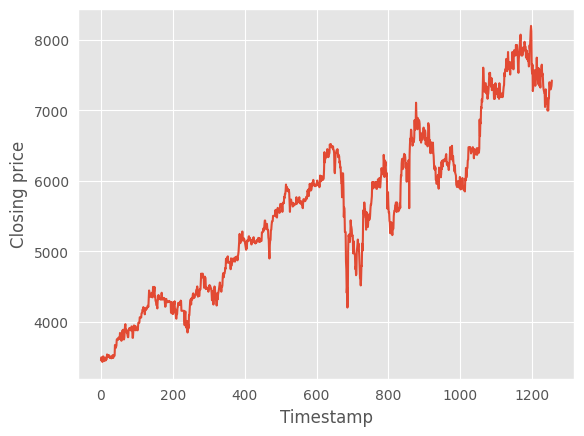

In [ ]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

923
231


# Training

In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

# BiLSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', RootMeanSquaredError()])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
24/24 [==============================] - 13s 107ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0657 - root_mean_squared_error: 0.0846 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0462 - val_root_mean_squared_error: 0.0602
Epoch 2/40
24/24 [==============================] - 1s 37ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0429 - root_mean_squared_error: 0.0573 - val_loss: 0.0024 - val_mse: 0.0024 - val_mae: 0.0390 - val_root_mean_squared_error: 0.0486
Epoch 3/40
24/24 [==============================] - 1s 38ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0392 - root_mean_squared_error: 0.0533 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0352 - val_root_mean_squared_error: 0.0437
Epoch 4/40
24/24 [==============================] - 1s 38ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0370 - root_mean_squared_error: 0.0499 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0331 - val_root_mean_squared_error: 0.0432
Epoch 5/40
24/24 [==============================] - 1s 38m

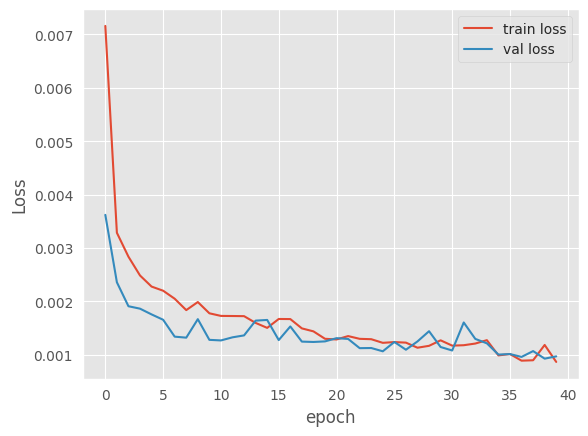

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

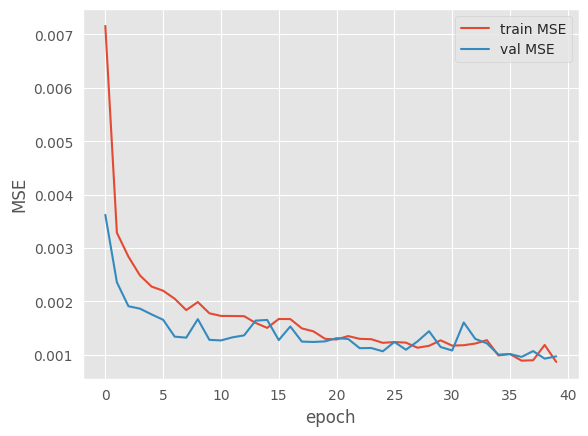

In [ ]:
plt.plot(history.history['mse'], label='train MSE')
plt.plot(history.history['val_mse'], label='val MSE')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()

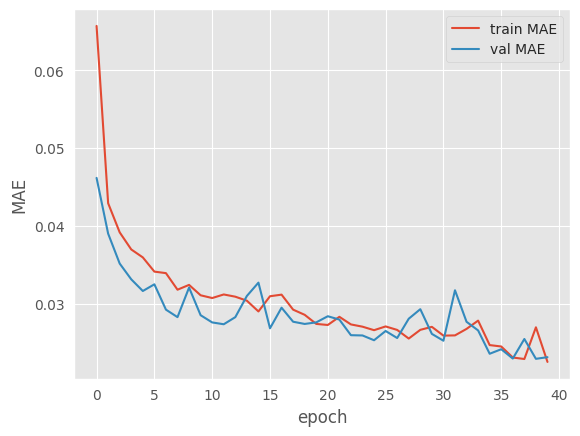

In [ ]:
plt.plot(history.history['mae'], label='train MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend()

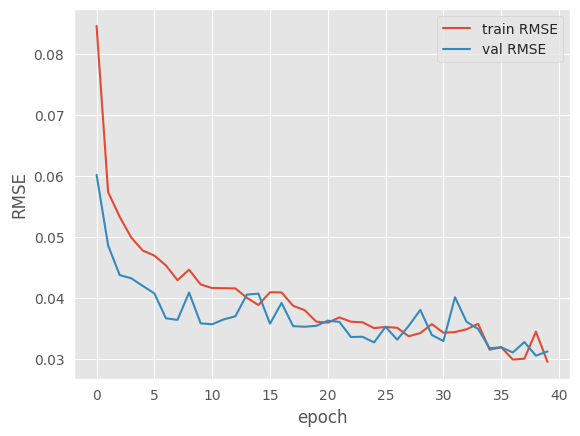

In [ ]:
plt.plot(history.history['root_mean_squared_error'], label='train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val RMSE')
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.legend()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

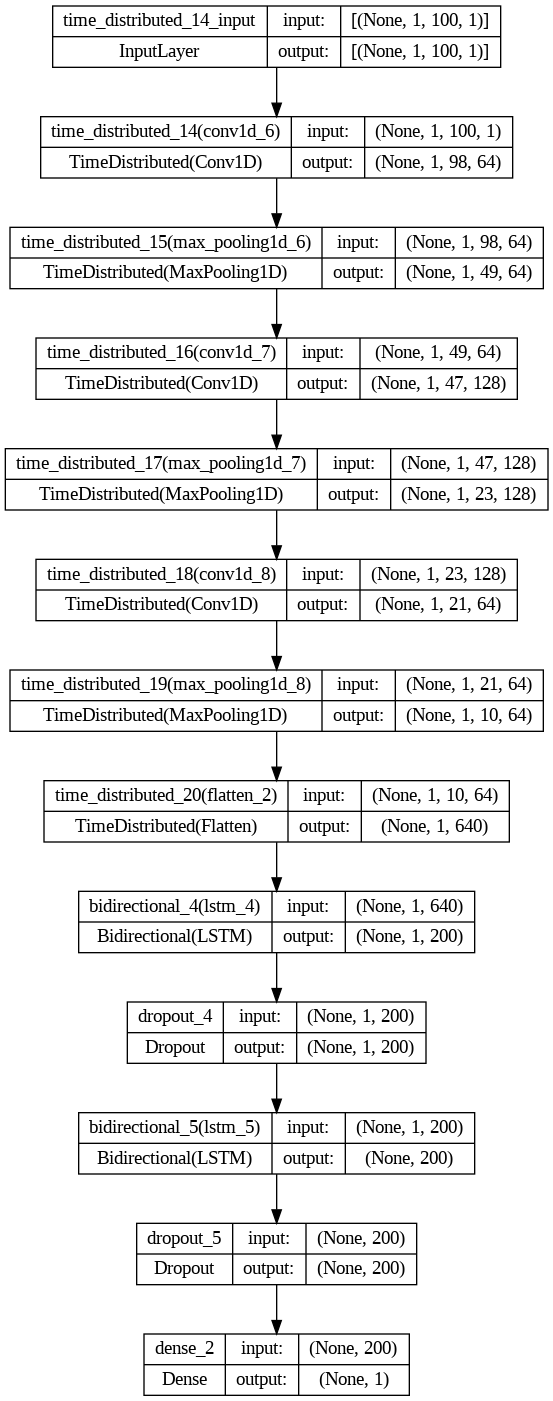

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 7ms/step - loss: 9.7173e-04 - mse: 9.7173e-04 - mae: 0.0231 - root_mean_squared_error: 0.0312


[0.0009717268403619528,
 0.0009717268403619528,
 0.023149345070123672,
 0.031172532588243484]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.908746
R2 Score: 0.907200
Max Error: 0.110508


8/8 [==============================] - 0s 7ms/step


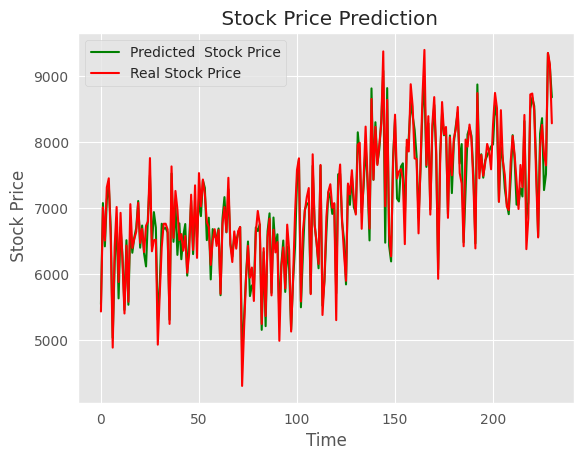

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [ ]:
# First we need to save a model
model.save("modelCNNBLSTM.h5")

In [ ]:
# Load model
new_model = tf.keras.models.load_model("./modelCNNBLSTM.h5")

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 21, 64)       

In [ ]:
# For data preprocessing and analysis part
# data2 = pd.read_excel('/content/drive/MyDrive/MachineLearning/ADRO.JK_dataprice.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/MachineLearning/BBCA_dataprice.xlsx')

data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)
print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    # first = df2.iloc[i,4] # changed from iloc[i,4] to [i,2]
    first = df2.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        # temp.append((df2.iloc[i + j, 4] - first) / first) #changed 4 to 2
        temp.append((df2.iloc[i + j, 2] - first) / first)
    # for j in range(week):
    # temp2.append((df2.iloc[i + window_size, 4] - first) / first) #changed 4 to 2
    temp2.append((df2.iloc[i + window_size, 2] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

<ipython-input-98-cb91387b680e>:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2.fillna(data.mean(), inplace=True)


             Open         High          Low        Close      Volume  \
0     3435.631645  3477.191706  3431.013861  3454.102783  65311000.0   
1     3486.427273  3504.898411  3458.720566  3495.662842  88810000.0   
2     3495.662842  3504.898411  3477.191704  3495.662842  62681500.0   
3     3518.751793  3518.751793  3426.396103  3463.338379  43917500.0   
4     3463.338654  3463.338654  3426.396375  3431.014160  70007000.0   
...           ...          ...          ...          ...         ...   
1250  7350.000000  7375.000000  7300.000000  7300.000000  31247600.0   
1251  7250.000000  7375.000000  7250.000000  7300.000000  44379900.0   
1252  7325.000000  7350.000000  7275.000000  7325.000000  58465500.0   
1253  7375.000000  7450.000000  7325.000000  7350.000000  86909700.0   
1254  7400.000000  7475.000000  7375.000000  7425.000000  60044300.0   

      Dividends  Stock Splits  
0           0.0             0  
1           0.0             0  
2           0.0             0  
3      

In [ ]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0232 - root_mean_squared_error: 0.0317   


[0.0010064711095765233,
 0.0010064711095765233,
 0.023224715143442154,
 0.03172492980957031]

8/8 [==============================] - 0s 11ms/step


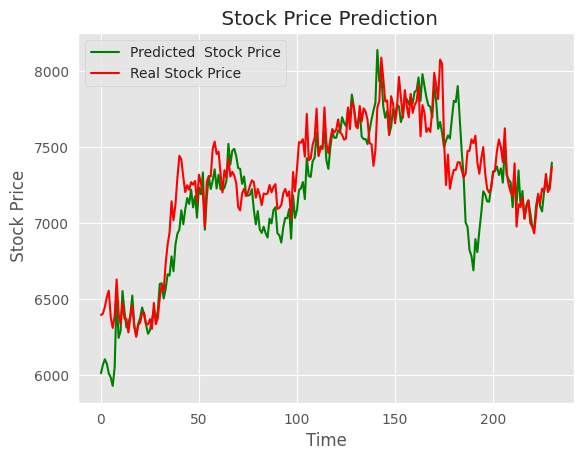

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
# Converting model from HDF5 format to TFJS format...
!pip install tensorflowjs[wizard]
# Need to be done on a CLI and not in notebook
!tensorflowjs_converter --input_format=keras /kaggle/working/model.h5 /kaggle/working/model-tjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-29 18:47:51.295772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 827, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 831, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 817, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 500, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_layers_model_conversion(
  

# EDA

In [ ]:
dataX = pd.read_excel('/content/drive/MyDrive/MachineLearning/BBCA_dataprice.xlsx')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1256 non-null   datetime64[ns]
 1   Open          1255 non-null   float64       
 2   High          1255 non-null   float64       
 3   Low           1255 non-null   float64       
 4   Close         1255 non-null   float64       
 5   Volume        1255 non-null   float64       
 6   Dividends     1256 non-null   float64       
 7   Stock Splits  1256 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 78.6 KB


In [ ]:
dataX.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-07-31,3435.631645,3477.191706,3431.013861,3454.102783,65311000.0,0.0,0
1,2017-08-01,3486.427273,3504.898411,3458.720566,3495.662842,88810000.0,0.0,0
2,2017-08-02,3495.662842,3504.898411,3477.191704,3495.662842,62681500.0,0.0,0
3,2017-08-03,3518.751793,3518.751793,3426.396103,3463.338379,43917500.0,0.0,0
4,2017-08-04,3463.338654,3463.338654,3426.396375,3431.014160,70007000.0,0.0,0


In [ ]:
start_date = '2017-07-31'
end_date = '2022-07-29'

fill = (dataX['Date']>=start_date) & (dataX['Date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-07-31,3435.631645,3477.191706,3431.013861,3454.102783,65311000.0,0.0,0
1,2017-08-01,3486.427273,3504.898411,3458.720566,3495.662842,88810000.0,0.0,0
2,2017-08-02,3495.662842,3504.898411,3477.191704,3495.662842,62681500.0,0.0,0
3,2017-08-03,3518.751793,3518.751793,3426.396103,3463.338379,43917500.0,0.0,0
4,2017-08-04,3463.338654,3463.338654,3426.396375,3431.014160,70007000.0,0.0,0
...,...,...,...,...,...,...,...,...
1251,2022-07-25,7350.000000,7375.000000,7300.000000,7300.000000,31247600.0,0.0,0
1252,2022-07-26,7250.000000,7375.000000,7250.000000,7300.000000,44379900.0,0.0,0
1253,2022-07-27,7325.000000,7350.000000,7275.000000,7325.000000,58465500.0,0.0,0
1254,2022-07-28,7375.000000,7450.000000,7325.000000,7350.000000,86909700.0,0.0,0


In [ ]:
dataX.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1256.000000,1256.000000
mean,5615.642379,5666.128212,5558.915038,5612.780879,7.983317e+07,0.382962,0.003981
std,1186.870797,1196.635812,1174.073975,1184.910905,4.870713e+07,5.336629,0.141083
min,3435.631645,3463.338435,3417.160615,3431.014160,0.000000e+00,0.000000,0.000000
25%,4483.680176,4530.385016,4446.316309,4483.680176,5.269025e+07,0.000000,0.000000
50%,5674.348905,5712.178006,5636.520720,5674.349609,7.020700e+07,0.000000,0.000000
75%,6404.430224,6451.279984,6363.451912,6400.107910,9.668335e+07,0.000000,0.000000
max,8250.000000,8250.000000,8075.000000,8200.000000,5.379715e+08,120.000000,5.000000


<ipython-input-106-8b85444e1395>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(dataX['Close'])


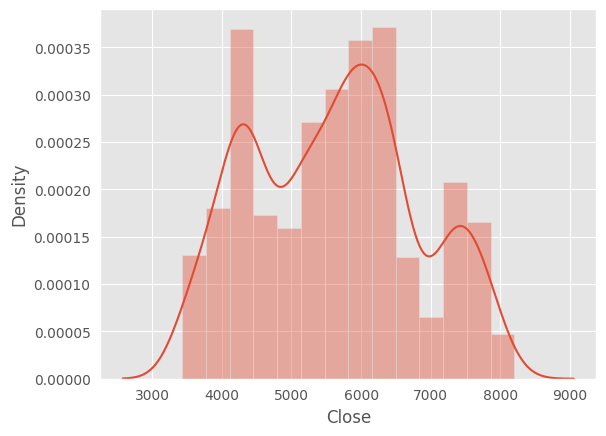

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

sns_plot = sns.distplot(dataX['Close'])

<ipython-input-107-5df29a997472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Close'], ax = ax[0,1])
<ipython-input-107-5df29a997472>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataX['Open'], ax = ax[1,1])
<ipython-input-107-5df29a997472>:7: UserWarning: 

`distplot` is a deprec

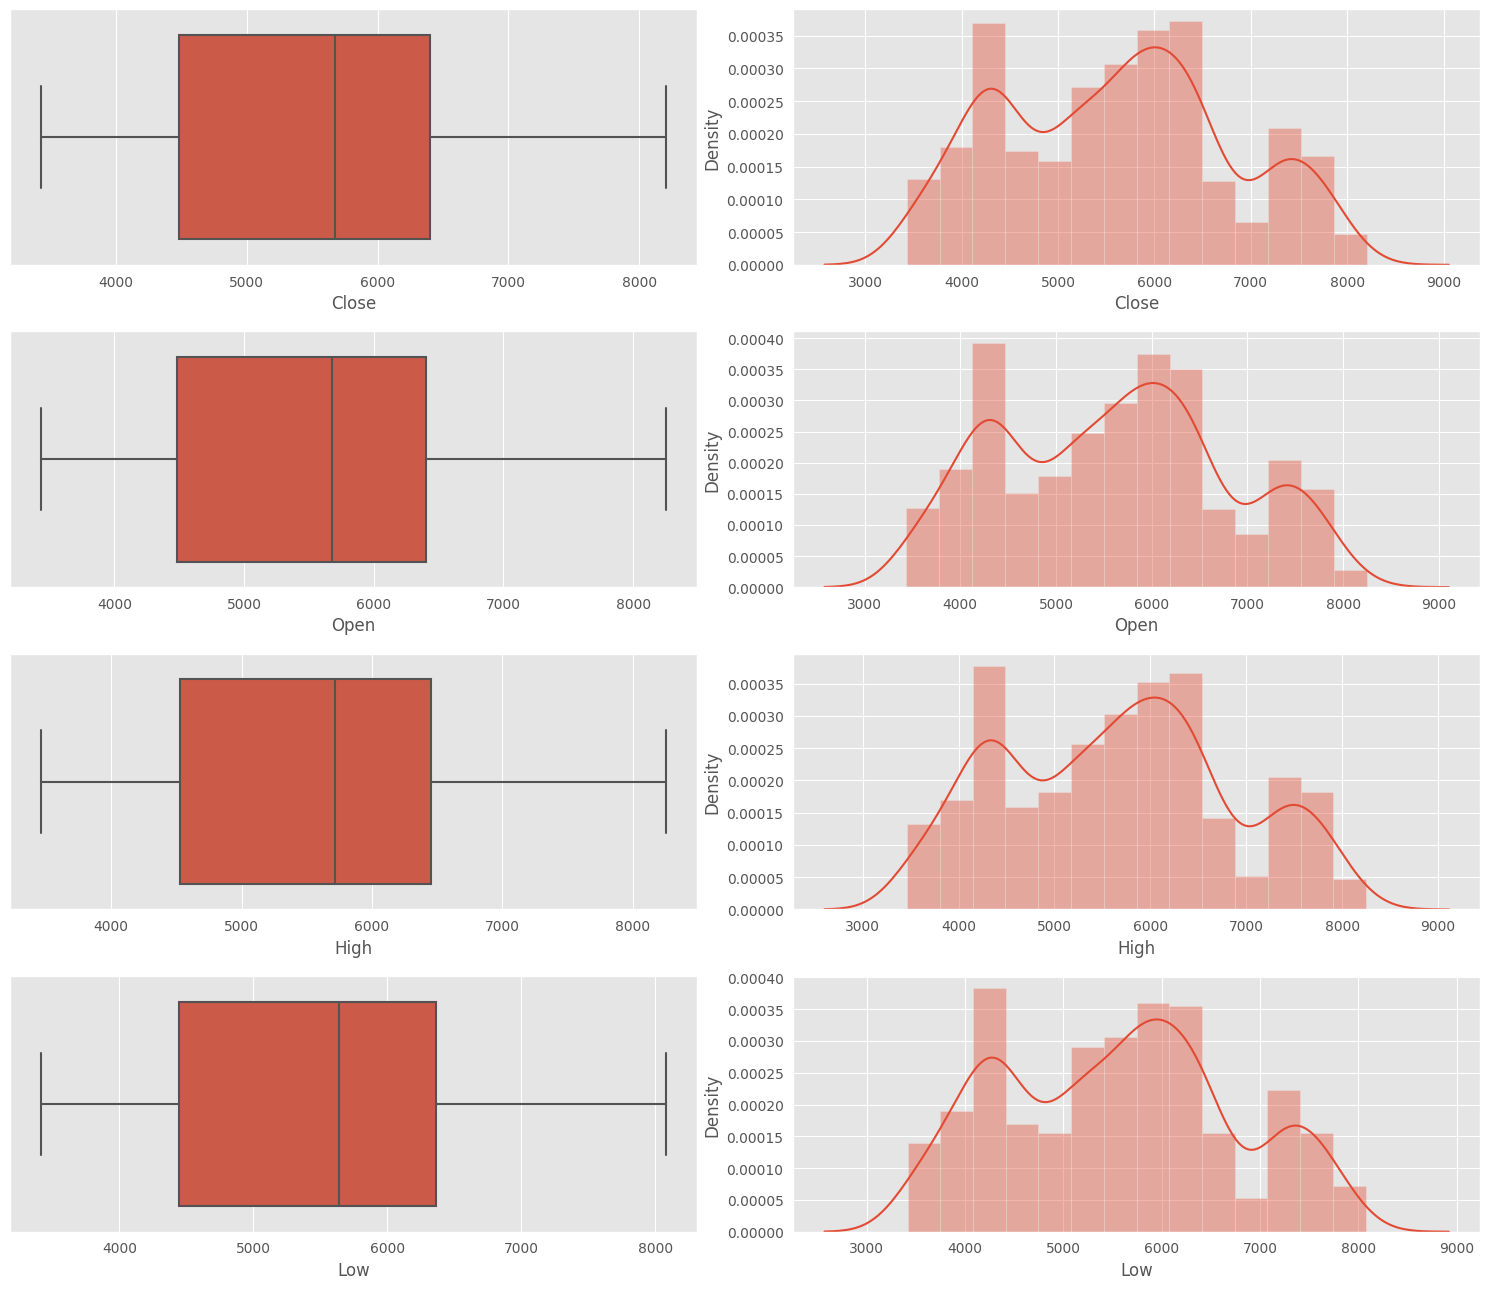

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["Close"], ax = ax[0,0])
sns.distplot(dataX['Close'], ax = ax[0,1])
sns.boxplot(x= dataX["Open"], ax = ax[1,0])
sns.distplot(dataX['Open'], ax = ax[1,1])
sns.boxplot(x= dataX["High"], ax = ax[2,0])
sns.distplot(dataX['High'], ax = ax[2,1])
sns.boxplot(x= dataX["Low"], ax = ax[3,0])
sns.distplot(dataX['Low'], ax = ax[3,1])
plt.tight_layout()

<ipython-input-108-f5ccb507b81d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)


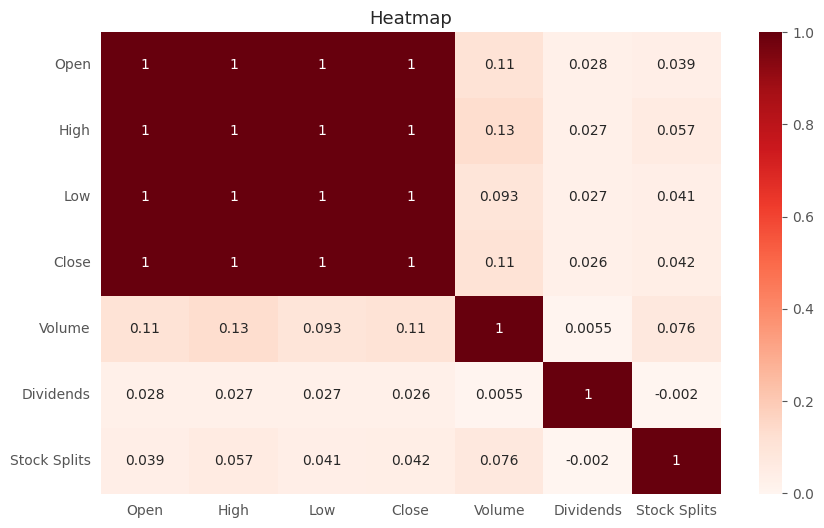

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',
         fontsize=13)
plt.show()

References: [Stock Market prediction using CNN-LSTM](https://www.kaggle.com/code/aadhityaa/stock-market-prediction-using-cnn-lstm#Training-part)